<a href="https://colab.research.google.com/github/jakuberwid/LMAD/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotnine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from plotnine import *

from scipy import stats

from sklearn.mixture import GaussianMixture, K

### Algorytm GMM

#### Grupowanie GMM w kolejnych krokach EM

In [ ]:
df = pd.DataFrame({'x' : [0.1,0.25,0.17,0.22,0.3,0.28,0.45,0.5,0.7,0.73,0.78,0.8,0.81,0.99]})

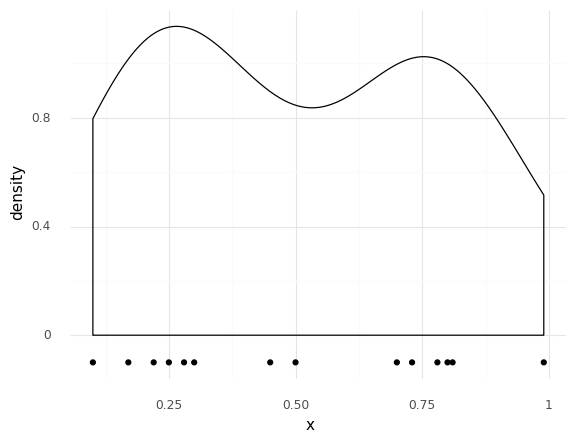

<ggplot: (8778071615393)>

In [ ]:
(ggplot(df, aes(x = 'x')) +
geom_density() +
geom_point(aes(y = -0.1))+
theme_minimal())

In [ ]:
sr_x = df.x.mean()
od_x = df.x.std()
print(sr_x, od_x)

print(df.x.to_list())
print(stats.norm.pdf(df.x, sr_x, od_x).round(2))
# (1/(od_x*np.sqrt(2*np.pi)))*np.power(np.e,-(np.power((df.x-sr_x),2)/(2*np.power(od_x,2))))
print(stats.gaussian_kde(df.x).evaluate(df.x).round(2))

0.5057142857142857 0.2905886409372504
[0.1, 0.25, 0.17, 0.22, 0.3, 0.28, 0.45, 0.5, 0.7, 0.73, 0.78, 0.8, 0.81, 0.99]
[0.52 0.93 0.7  0.85 1.07 1.02 1.35 1.37 1.1  1.02 0.88 0.82 0.79 0.34]
[0.77 1.07 0.96 1.04 1.07 1.08 0.92 0.89 0.97 0.97 0.96 0.94 0.93 0.53]


In [ ]:
df['pdf'] = stats.norm.pdf(df.x, sr_x, od_x)
df['cdf'] = stats.norm.cdf(df.x, sr_x, od_x)
df['g'] = stats.gaussian_kde(df.x).evaluate(df.x)

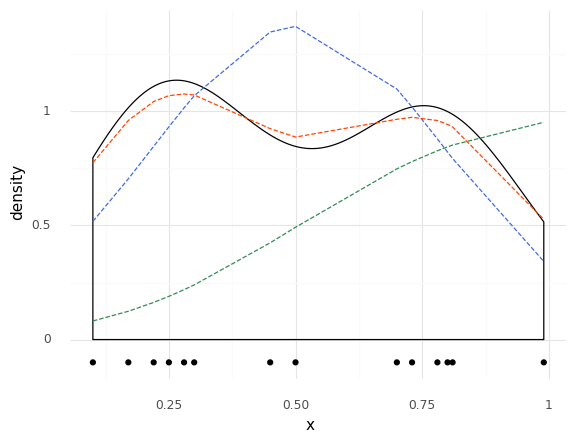

<ggplot: (8778071531913)>

In [ ]:
(ggplot(df, aes(x = 'x')) +
geom_density() +
geom_point(aes(y = -0.1))+
geom_line(aes(y = 'pdf'), color = 'royalblue', linetype = 'dashed') +
geom_line(aes(y = 'cdf'), color = 'seagreen', linetype = 'dashed') +
geom_line(aes(y = 'g'), color = 'orangered', linetype = 'dashed') +
theme_minimal())

In [ ]:
# Iter0

# etap E
# np.random.seed(2)
# df['klastry0'] = np.random.randint(0,2,df.shape[0])

# (ggplot(df, aes(x = 'x', y = -0.1, fill = 'factor(klastry0)')) +
#  geom_point(size = 4, alpha = 0.5) +
#  theme_minimal() +
#  labs(fill = "Klastry0"))

# # etap M

sr_0 = df.x.where(df.klastry0 == 0).mean()
od_0 = df.x.where(df.klastry0 == 0).std()
sr_1 = df.x.where(df.klastry0 == 1).mean()
od_1 = df.x.where(df.klastry0 == 1).std()

# Wizualizacja
print(f'Parametry zer: {sr_0:.3f}, {od_0:.3f},\nParametry jedynek: {sr_1:.3f}, {od_1:.3f}')

(ggplot(df, aes(x = 'x', color = 'factor(klastry0)')) +
geom_density() +
geom_point(aes(x = 'x', y = -0.1, color = 'factor(klastry0)')) +
geom_rect(xmin=sr_0-od_0, xmax=sr_0+od_0, ymin=0, ymax=1.3, fill = 'salmon', color = 'salmon', alpha = 0.01, linetype = 'dotted') +
geom_rect(xmin=sr_1-od_1, xmax=sr_1+od_1, ymin=0, ymax=1.3, fill = 'turquoise', color = 'turquoise', alpha = 0.01, linetype = 'dotted') +
theme_minimal()+labs(color = 'klastry0'))

AttributeError: ignored

In [ ]:
# Iter1
## etap E

# df['prawd_0'] = stats.norm.pdf(df.x, sr_0, od_0)
# df['prawd_1'] = stats.norm.pdf(df.x, sr_1, od_1)

# # Wizualizacja w trakcie E
# (ggplot(df) +
# geom_point(aes(x = 'x', y = -0.1)) +
# geom_line(aes(x = 'x', y = 'prawd_0'), color = "salmon") +
# geom_line(aes(x = 'x', y = 'prawd_1'), color = "turquoise") +
# theme_minimal())

# df['klastry1'] = np.where(df.prawd_0 > df.prawd_1, 0, 1)

# # Wizualizacja po E
# (ggplot(df) +
# geom_point(aes(x = 'x', y = -0.1, color = 'factor(klastry1)')) +
# geom_line(aes(x = 'x', y = 'prawd_0'), color = "salmon") +
# geom_line(aes(x = 'x', y = 'prawd_1'), color = "turquoise") +
# theme_minimal() + labs(color = 'Klastry1'))

# # # etap M

# sr_0 = df.x.where(df.klastry1 == 0).mean()
# od_0 = df.x.where(df.klastry1 == 0).std()
# sr_1 = df.x.where(df.klastry1 == 1).mean()
# od_1 = df.x.where(df.klastry1 == 1).std()

# # Wizualizacja po M

# (ggplot(df) +
# geom_point(aes(x = 'x', y = -0.1, color = 'factor(klastry1)')) +
# geom_line(aes(x = 'x', y = 'prawd_0'), color = "salmon") +
# geom_line(aes(x = 'x', y = 'prawd_1'), color = "turquoise") +
# geom_rect(xmin=sr_0-od_0, xmax=sr_0+od_0, ymin=0, ymax=1.5, fill = 'salmon', color = 'salmon', alpha = 0.01, linetype = 'dotted') +
# geom_rect(xmin=sr_1-od_1, xmax=sr_1+od_1, ymin=0, ymax=1.5, fill = 'turquoise', color = 'turquoise', alpha = 0.01, linetype = 'dotted') +
# theme_minimal() + labs(color = 'Klastry1'))

In [ ]:
# Iter2
## etap E

# df['prawd_0'] = stats.norm.pdf(df.x, sr_0, od_0)
# df['prawd_1'] = stats.norm.pdf(df.x, sr_1, od_1)

# # # Wizualizacja w trakcie E
# (ggplot(df) +
# geom_point(aes(x = 'x', y = -0.1)) +
# geom_line(aes(x = 'x', y = 'prawd_0'), color = "salmon") +
# geom_line(aes(x = 'x', y = 'prawd_1'), color = "turquoise") +
# theme_minimal())

# df['klastry2'] = np.where(df.prawd_0 > df.prawd_1, 0, 1)

# # Wizualizacja po E
# (ggplot(df) +
# geom_point(aes(x = 'x', y = -0.1, color = 'factor(klastry2)')) +
# geom_line(aes(x = 'x', y = 'prawd_0'), color = "salmon") +
# geom_line(aes(x = 'x', y = 'prawd_1'), color = "turquoise") +
# theme_minimal() + labs(color = 'Klastry2'))

# # etap M

# sr_0 = df.x.where(df.klastry2 == 0).mean()
# od_0 = df.x.where(df.klastry2 == 0).std()
# sr_1 = df.x.where(df.klastry2 == 1).mean()
# od_1 = df.x.where(df.klastry2 == 1).std()

# # Wizualizacja po M

# (ggplot(df) +
# geom_point(aes(x = 'x', y = -0.1, color = 'factor(klastry2)')) +
# geom_line(aes(x = 'x', y = 'prawd_0'), color = "salmon") +
# geom_line(aes(x = 'x', y = 'prawd_1'), color = "turquoise") +
# geom_rect(xmin=sr_0-od_0, xmax=sr_0+od_0, ymin=0, ymax=4, fill = 'salmon', color = 'salmon', alpha = 0.01, linetype = 'dotted') +
# geom_rect(xmin=sr_1-od_1, xmax=sr_1+od_1, ymin=0, ymax=4, fill = 'turquoise', color = 'turquoise', alpha = 0.01, linetype = 'dotted') +
# theme_minimal() + labs(color = 'Klastry2'))

In [ ]:
# Iter3
## etap E

# df['prawd_0'] = stats.norm.pdf(df.x, sr_0, od_0)
# df['prawd_1'] = stats.norm.pdf(df.x, sr_1, od_1)

# # # Wizualizacja w trakcie E
# (ggplot(df) +
# geom_point(aes(x = 'x', y = -0.1)) +
# geom_line(aes(x = 'x', y = 'prawd_0'), color = "salmon") +
# geom_line(aes(x = 'x', y = 'prawd_1'), color = "turquoise") +
# theme_minimal())

# df['klastry3'] = np.where(df.prawd_0 > df.prawd_1, 0, 1)

# Wizualizacja po E
# (ggplot(df) +
# geom_point(aes(x = 'x', y = -0.1, color = 'factor(klastry3)')) +
# geom_line(aes(x = 'x', y = 'prawd_0'), color = "salmon") +
# geom_line(aes(x = 'x', y = 'prawd_1'), color = "turquoise") +
# theme_minimal() + labs(color = 'Klastry3'))

# # etap M

# sr_0 = df.x.where(df.klastry3 == 0).mean()
# od_0 = df.x.where(df.klastry3 == 0).std()
# sr_1 = df.x.where(df.klastry3 == 1).mean()
# od_1 = df.x.where(df.klastry3 == 1).std()

# # Wizualizacja po M

# (ggplot(df) +
# geom_point(aes(x = 'x', y = -0.1, color = 'factor(klastry3)')) +
# geom_line(aes(x = 'x', y = 'prawd_0'), color = "salmon") +
# geom_line(aes(x = 'x', y = 'prawd_1'), color = "turquoise") +
# geom_rect(xmin=sr_0-od_0, xmax=sr_0+od_0, ymin=0, ymax=4, fill = 'salmon', color = 'salmon', alpha = 0.01, linetype = 'dotted') +
# geom_rect(xmin=sr_1-od_1, xmax=sr_1+od_1, ymin=0, ymax=4, fill = 'turquoise', color = 'turquoise', alpha = 0.01, linetype = 'dotted') +
# theme_minimal() + labs(color = 'Klastry3'))

### Porównanie wyników z `GaussianMixture`

In [ ]:
# GMM
gm = GaussianMixture(n_components=2).fit(df[['x']])

# dodanie do ramki kolumny z etykietami klastrów
df['Kgm'] = gm.predict(df[['x']])

# wykres
(ggplot(df, aes(x = 'x', y = -0.1, fill = 'factor(Kgm)')) +
 geom_point(size = 4, alpha = 0.5) +
 theme_minimal() +
 labs(fill = "GM"))

In [ ]:
gm.n_iter_

NameError: ignored

In [ ]:
gm.predict_proba(df[['x']]).round(3)

NameError: ignored

In [ ]:
df[['prawd_0', 'prawd_1']].round(3)

KeyError: ignored